In [141]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [142]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [149]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [150]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [152]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import mode, norm, skew

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

from prophet import Prophet
from prophet.plot import plot_plotly
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

In [153]:
import warnings
import time
import datetime
import pickle

import warnings
warnings.filterwarnings("ignore")

In [154]:
df = pd.read_csv('Hotel_Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [156]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [157]:
features_stat = df.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(df))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
24,company,112593,0.943069
23,agent,16340,0.136862
13,country,488,0.004087
10,children,4,0.000034
19,reserved_room_type,0,0.000000
20,assigned_room_type,0,0.000000
21,booking_changes,0,0.000000
22,deposit_type,0,0.000000
0,hotel,0,0.000000
17,previous_cancellations,0,0.000000


In [158]:
most_frequent_agentid = df['agent'].mode()[0]
most_frequent_companyid = df['company'].mode()[0]
most_frequent_country = df['country'].mode()[0]
most_frequent_children = df['children'].mode()[0]

df['agent'].fillna(most_frequent_agentid, inplace=True)
df['children'].fillna(most_frequent_children, inplace=True)
df['company'].fillna(most_frequent_companyid, inplace=True)
df['country'].fillna(most_frequent_country, inplace=True)

In [159]:
features_stat = df.isna().sum().rename('num_of_missing').reset_index()
features_stat.columns = ['feature', 'num_of_missing']
features_stat['percentage_of_missings'] = features_stat['num_of_missing'].apply(lambda x:x/len(df))
features_stat.sort_values(by='percentage_of_missings',ascending=False)

,feature,num_of_missing,percentage_of_missings
0,hotel,0,0.0
1,is_canceled,0,0.0
30,reservation_status,0,0.0
29,total_of_special_requests,0,0.0
28,required_car_parking_spaces,0,0.0
27,adr,0,0.0
26,customer_type,0,0.0
25,days_in_waiting_list,0,0.0
24,company,0,0.0
23,agent,0,0.0


In [160]:
cols = ["children", "agent", "company"]
df[cols] = df[cols].applymap(np.int64)

In [161]:
datetime_object = df['arrival_date_month'].str[0:3]
month_number = np.zeros(len(datetime_object))

# Creating a new column based on numerical representation of the months
for i in range(0, len(datetime_object)):
    datetime_object[i] = datetime.datetime.strptime(datetime_object[i], "%b")
    month_number[i] = datetime_object[i].month

# Float to integer conversion
month_number = pd.DataFrame(month_number).astype(int)

df['arrival_date'] = df['arrival_date_year'].map(str) + '-' + month_number[0].map(str) + '-' \
                       + df['arrival_date_day_of_month'].map(str)

# Dropping already used columns
df = df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
                  'arrival_date_week_number'], axis=1)
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0,0,BB,PRT,...,9,40,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
1,Resort Hotel,0,737,0,0,2,0,0,BB,PRT,...,9,40,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-7-1
2,Resort Hotel,0,7,0,1,1,0,0,BB,GBR,...,9,40,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
3,Resort Hotel,0,13,0,1,1,0,0,BB,GBR,...,304,40,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-7-1
4,Resort Hotel,0,14,0,2,2,0,0,BB,GBR,...,240,40,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-7-1


In [162]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

print('Datatype of the arrival_date:', df['arrival_date'].dtype)
print('Datatype of the reservation_status_date:', df['reservation_status_date'].dtype)

Datatype of the arrival_date: datetime64[ns]
Datatype of the reservation_status_date: datetime64[ns]


In [168]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
df['Total Guests'] = df['adults'] + df['children']

NumberOfGuests_Daily = dataNoCancel['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()
NumberOfGuests_Daily = NumberOfGuests_Daily.resample('d').sum().to_frame()
adf_test(NumberOfGuests_Daily['Total Guests'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.603566
p-value                          0.092263
#Lags Used                      20.000000
Number of Observations Used    772.000000
Critical Value (1%)             -3.438849
Critical Value (5%)             -2.865291
Critical Value (10%)            -2.568767
dtype: float64


In [169]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Function for Dickey-Fuller Test
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Summing total guests (adults + children)
df['Total Guests'] = df['adults'] + df['children']

# Group data by arrival date and sum guests
NumberOfGuests_Daily = dataNoCancel['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()

# Resample to daily data, converting to DataFrame
NumberOfGuests_Daily = NumberOfGuests_Daily.resample('D').sum().to_frame()

# Perform Dickey-Fuller test before differencing
print("Before Differencing:")
adf_test(NumberOfGuests_Daily['Total Guests'])

# Apply differencing (first order difference)
NumberOfGuests_Daily_Diff = NumberOfGuests_Daily.diff()

# Perform Dickey-Fuller test after differencing
print("\nAfter Differencing:")
adf_test(NumberOfGuests_Daily_Diff['Total Guests'])

Before Differencing:
Results of Dickey-Fuller Test:
Test Statistic                  -2.603566
p-value                          0.092263
#Lags Used                      20.000000
Number of Observations Used    772.000000
Critical Value (1%)             -3.438849
Critical Value (5%)             -2.865291
Critical Value (10%)            -2.568767
dtype: float64

After Differencing:
Results of Dickey-Fuller Test:
Test Statistic                -1.027481e+01
p-value                        3.915824e-18
#Lags Used                     1.900000e+01
Number of Observations Used    7.720000e+02
Critical Value (1%)           -3.438849e+00
Critical Value (5%)           -2.865291e+00
Critical Value (10%)          -2.568767e+00
dtype: float64


In [179]:
dataNoCancel = df[df['is_canceled'] == 0]
dataNoCancel = dataNoCancel.reset_index(drop=True)

NumberOfGuests_Daily = dataNoCancel['Total Guests'].groupby(dataNoCancel['arrival_date']).sum()
NumberOfGuests_Daily = NumberOfGuests_Daily.resample('d').sum().to_frame()

from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(NumberOfGuests_Daily['Total Guests'])

Results of KPSS Test:
Test Statistic            1.534473
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


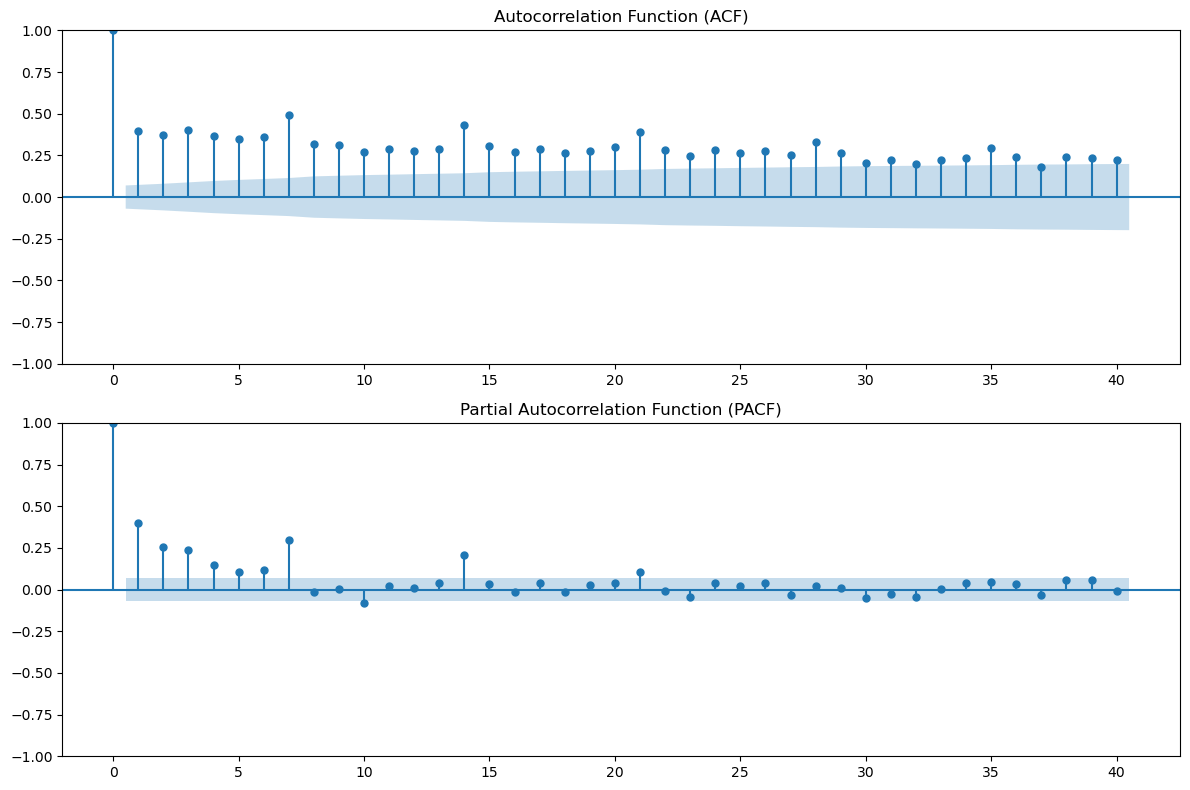

In [183]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    # ACF plot
    sm.graphics.tsa.plot_acf(timeseries.dropna(), lags=40, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # PACF plot
    sm.graphics.tsa.plot_pacf(timeseries.dropna(), lags=40, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

# Plot ACF and PACF for the differenced data
plot_acf_pacf(NumberOfGuests_Daily['Total Guests'])


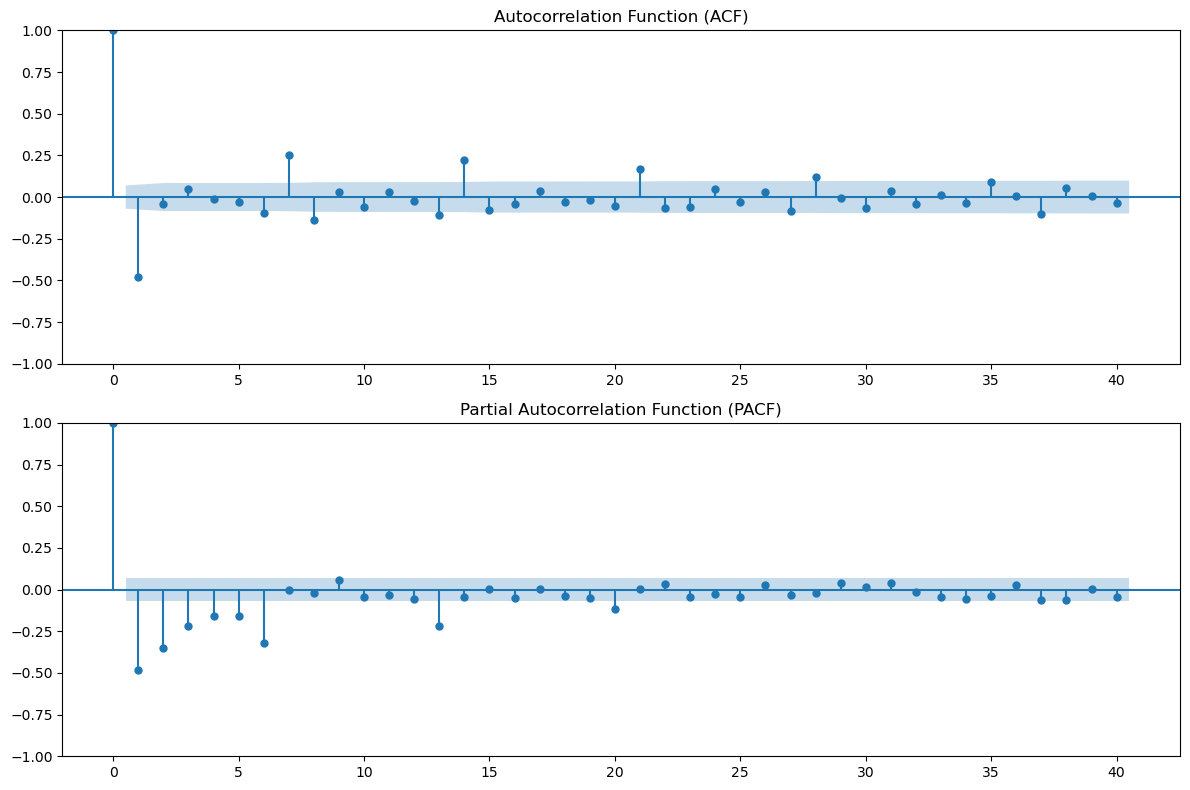

In [184]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot ACF and PACF
def plot_acf_pacf(timeseries):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))

    # ACF plot
    sm.graphics.tsa.plot_acf(timeseries.dropna(), lags=40, ax=ax[0])
    ax[0].set_title('Autocorrelation Function (ACF)')

    # PACF plot
    sm.graphics.tsa.plot_pacf(timeseries.dropna(), lags=40, ax=ax[1])
    ax[1].set_title('Partial Autocorrelation Function (PACF)')

    plt.tight_layout()
    plt.show()

plot_acf_pacf(NumberOfGuests_Daily_Diff['Total Guests'])

In [354]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(NumberOfGuests_Daily_Diff, order=(6, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:           Total Guests   No. Observations:                  793
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -4804.322
Date:                Fri, 27 Sep 2024   AIC                           9624.644
Time:                        11:31:42   BIC                           9662.040
Sample:                    07-01-2015   HQIC                          9639.017
                         - 08-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8027      0.029    -27.308      0.000      -0.860      -0.745
ar.L2         -0.7228      0.038    -18.981      0.000      -0.797      -0.648
ar.L3         -0.6343      0.040    -15.700      0.0

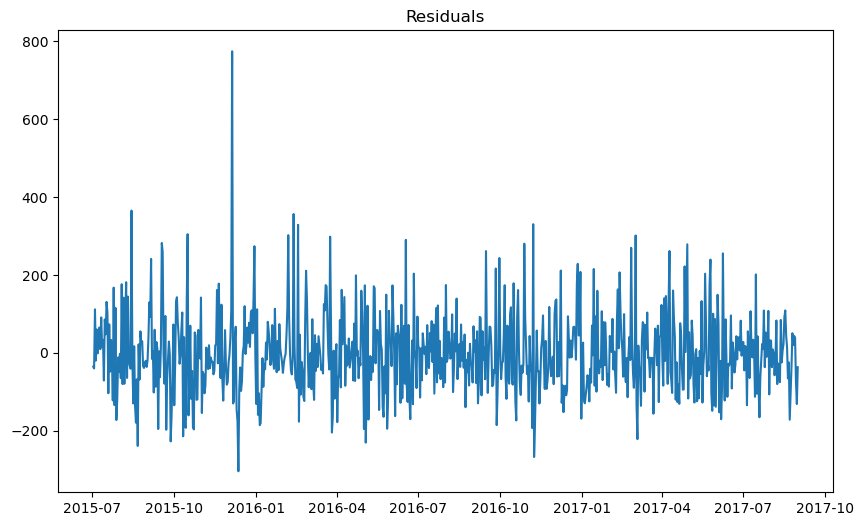

    lb_stat  lb_pvalue
10      NaN        NaN


In [355]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Ljung-Box test to check if residuals are random
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

2017-09-01    58.651279
2017-09-02    -6.251700
2017-09-03    -8.735012
2017-09-04    -7.642772
2017-09-05   -40.982319
2017-09-06   -11.167810
2017-09-07    32.312019
2017-09-08    19.095057
2017-09-09    -2.120203
2017-09-10    -4.880297
2017-09-11    -4.844290
2017-09-12   -11.495976
2017-09-13    -1.435251
2017-09-14    10.621606
2017-09-15     6.153485
2017-09-16    -0.828253
2017-09-17    -2.174996
2017-09-18    -2.055638
2017-09-19    -3.029185
2017-09-20     0.307849
2017-09-21     3.586363
2017-09-22     2.016085
2017-09-23    -0.284430
2017-09-24    -0.807315
2017-09-25    -0.678642
2017-09-26    -0.658595
2017-09-27     0.427454
2017-09-28     1.291293
2017-09-29     0.727755
2017-09-30    -0.027508
Freq: D, Name: predicted_mean, dtype: float64


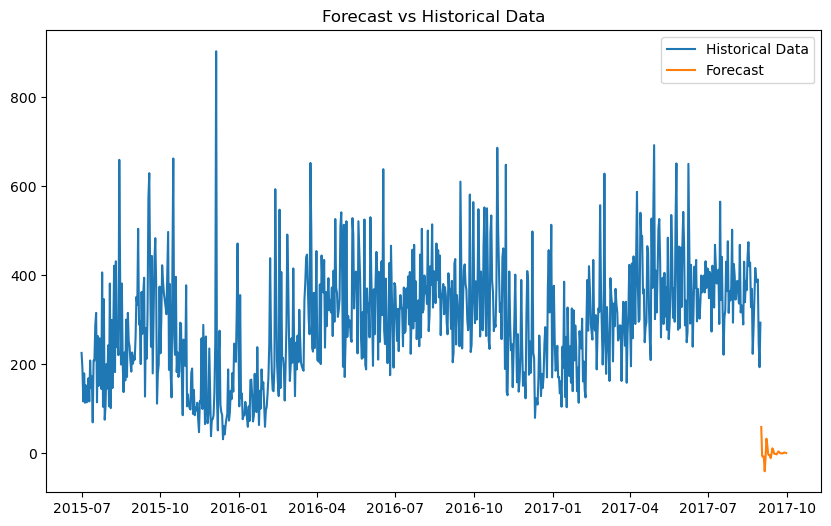

In [356]:
# Forecasting future values
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(NumberOfGuests_Daily['Total Guests'], label='Historical Data')
plt.plot(forecast, label='Forecast')
plt.title('Forecast vs Historical Data')
plt.legend()
plt.show()

Forecasted Values:
 2017-09-01    58.651279
2017-09-02    -6.251700
2017-09-03    -8.735012
2017-09-04    -7.642772
2017-09-05   -40.982319
2017-09-06   -11.167810
2017-09-07    32.312019
2017-09-08    19.095057
2017-09-09    -2.120203
2017-09-10    -4.880297
2017-09-11    -4.844290
2017-09-12   -11.495976
2017-09-13    -1.435251
2017-09-14    10.621606
2017-09-15     6.153485
2017-09-16    -0.828253
2017-09-17    -2.174996
2017-09-18    -2.055638
2017-09-19    -3.029185
2017-09-20     0.307849
2017-09-21     3.586363
2017-09-22     2.016085
2017-09-23    -0.284430
2017-09-24    -0.807315
2017-09-25    -0.678642
2017-09-26    -0.658595
2017-09-27     0.427454
2017-09-28     1.291293
2017-09-29     0.727755
2017-09-30    -0.027508
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
             lower Total Guests  upper Total Guests
2017-09-01         -143.958166          261.260724
2017-09-02         -265.902153          253.398753
2017-09-03         -268.867791       

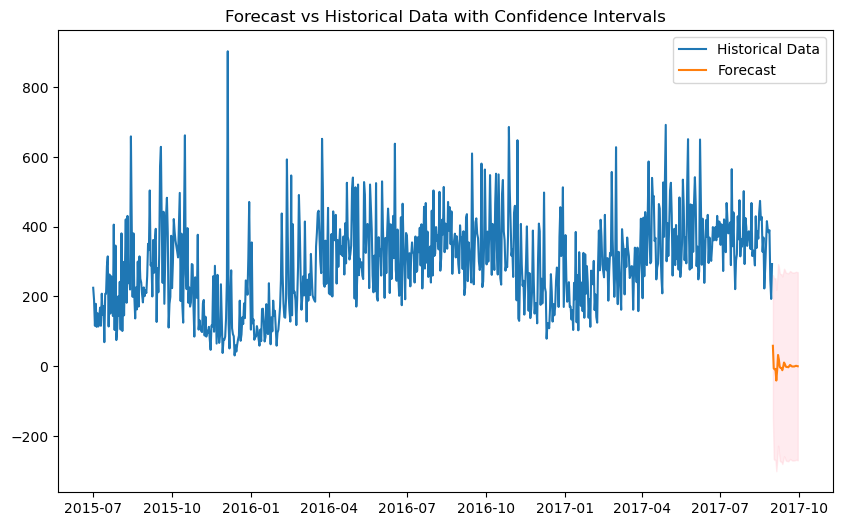

In [357]:
# Forecasting future values with confidence intervals
forecast_steps = 30  # Number of days to forecast
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Get the forecast mean and confidence intervals (95% by default)
forecast_mean = forecast_result.predicted_mean
confidence_intervals = forecast_result.conf_int()

# Print forecasted values and confidence intervals
print("Forecasted Values:\n", forecast_mean)
print("\nConfidence Intervals:\n", confidence_intervals)

# Plot the forecast with confidence intervals
plt.figure(figsize=(10,6))

# Plot historical data
plt.plot(NumberOfGuests_Daily['Total Guests'], label='Historical Data')

# Plot forecasted values
plt.plot(forecast_mean, label='Forecast')

# Plot the confidence intervals
plt.fill_between(forecast_mean.index, 
                 confidence_intervals.iloc[:, 0],  # Lower bound of the confidence interval
                 confidence_intervals.iloc[:, 1],  # Upper bound of the confidence interval
                 color='pink', alpha=0.3)

plt.title('Forecast vs Historical Data with Confidence Intervals')
plt.legend()
plt.show()


In [358]:
# Summing total guests (adults + children)
df['Total Guests'] = df['adults'] + df['children']

# Group data by arrival date and sum guests
NumberOfGuests_Daily = df['Total Guests'].groupby(df['arrival_date']).sum()

# Resample to daily data, converting to DataFrame
NumberOfGuests_Daily = NumberOfGuests_Daily.resample('D').sum().to_frame()

In [359]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Dickey-Fuller Test
def adf_test(timeseries):
    print('Dickey-Fuller Test Results:')
    dftest = adfuller(timeseries.dropna())
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Apply ADF Test
adf_test(NumberOfGuests_Daily['Total Guests'])

Dickey-Fuller Test Results:
Test Statistic                  -2.272337
p-value                          0.181045
#Lags Used                      20.000000
Number of Observations Used    772.000000
Critical Value (1%)             -3.438849
Critical Value (5%)             -2.865291
Critical Value (10%)            -2.568767
dtype: float64


In [360]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Dickey-Fuller Test
def adf_test(timeseries):
    print('Dickey-Fuller Test Results:')
    dftest = adfuller(timeseries.dropna())
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Apply ADF Test
NumberOfGuests_Daily_Diff = NumberOfGuests_Daily.diff()
adf_test(NumberOfGuests_Daily_Diff['Total Guests'])


Dickey-Fuller Test Results:
Test Statistic                -1.086789e+01
p-value                        1.392349e-19
#Lags Used                     1.900000e+01
Number of Observations Used    7.720000e+02
Critical Value (1%)           -3.438849e+00
Critical Value (5%)           -2.865291e+00
Critical Value (10%)          -2.568767e+00
dtype: float64


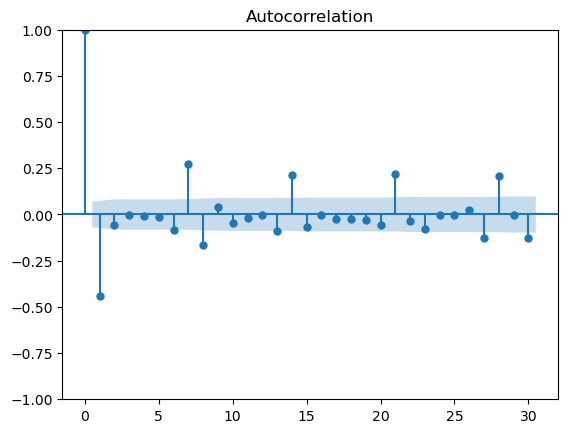

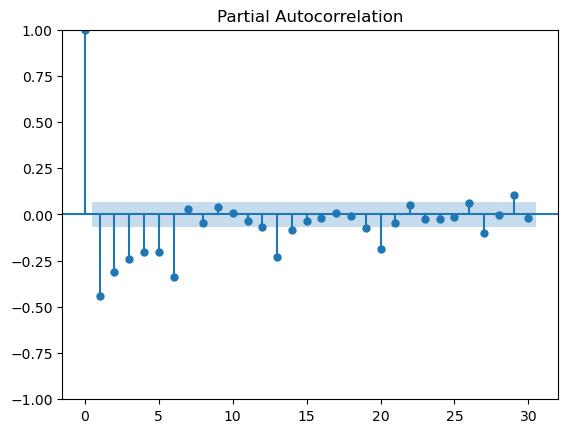

In [361]:
# Plot ACF and PACF
plot_acf(NumberOfGuests_Daily_Diff.dropna(), lags=30)
plot_pacf(NumberOfGuests_Daily_Diff.dropna(), lags=30)
plt.show()

In [362]:
# Fit SARIMA model with specified orders
model = SARIMAX(NumberOfGuests_Daily['Total Guests'], 
                order=(6,1,1),  # ARIMA orders (p,d,q)
                seasonal_order=(6,1,1,7),  # Seasonal orders (P,D,Q,s)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
model_fit = model.fit(disp=False)

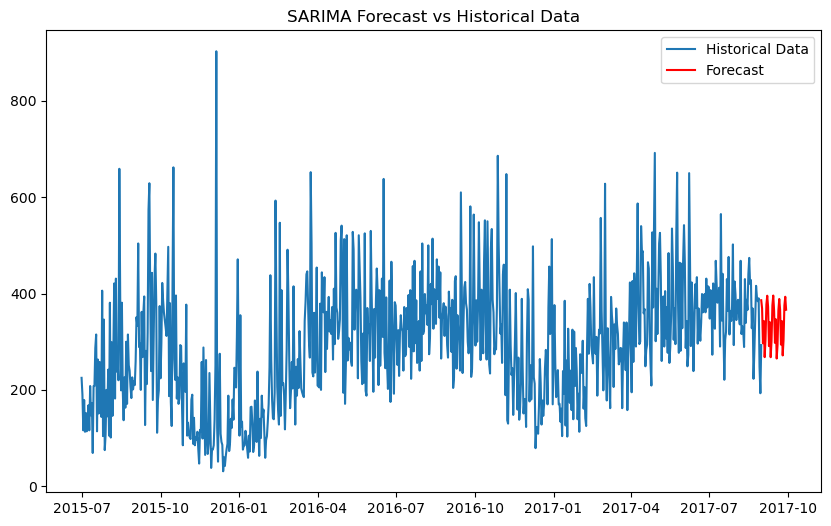

In [363]:
# Forecasting future values
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast against historical data
plt.figure(figsize=(10, 6))
plt.plot(NumberOfGuests_Daily.index, NumberOfGuests_Daily['Total Guests'], label='Historical Data')
plt.plot(pd.date_range(NumberOfGuests_Daily.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Historical Data')
plt.legend()
plt.show()

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [365]:
register_matplotlib_converters()


In [366]:
# Fit the ARIMA model to the historical data
model = ARIMA(NumberOfGuests_Daily['Total Guests'], order=(6, 1, 1))
model_fit = model.fit()

In [367]:
forecast_steps = 30  # Forecast for 30 days
forecast_object = model_fit.get_forecast(steps=forecast_steps)

In [368]:
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

In [369]:
forecast_index = pd.date_range(start=NumberOfGuests_Daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

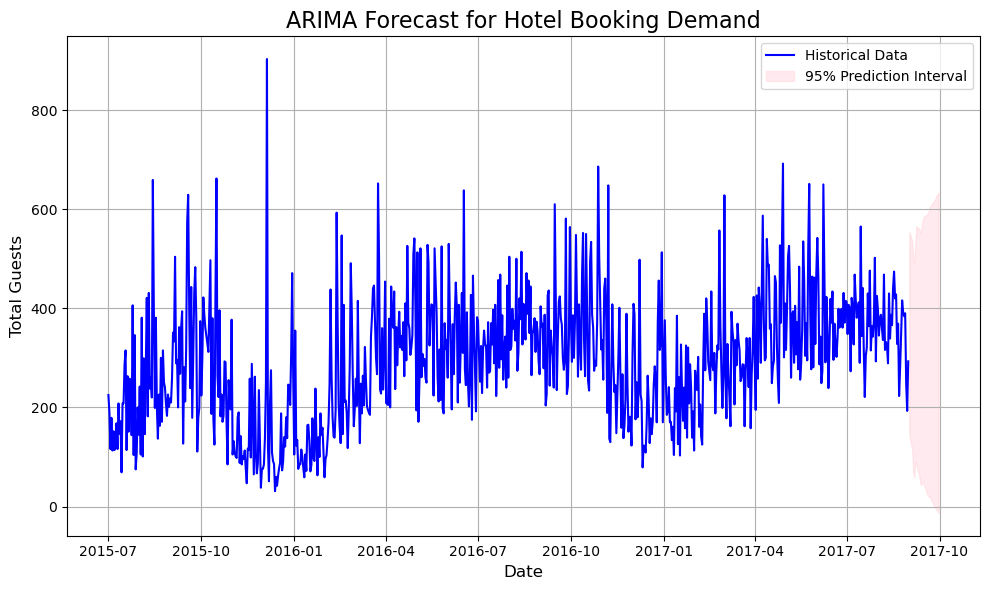

In [370]:
plt.figure(figsize=(10, 6))
plt.plot(NumberOfGuests_Daily.index, NumberOfGuests_Daily['Total Guests'], label='Historical Data', color='blue')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Prediction Interval')

# Adding titles and labels
plt.title('ARIMA Forecast for Hotel Booking Demand', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Guests', fontsize=12)
plt.legend()

# Display the plot
plt.tight_layout()
plt.grid(True)
plt.show()

In [371]:
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}, index=forecast_index)
print(forecast_df)

              Forecast    Lower CI    Upper CI
2017-09-01  349.980813  146.787344  553.174281
2017-09-02  341.128595  133.501951  548.755239
2017-09-03  332.697903  123.483238  541.912568
2017-09-04  324.717780  113.687584  535.747976
2017-09-05  282.178657   68.937498  495.419815
2017-09-06  275.565419   59.314320  491.816518
2017-09-07  310.390329   89.901865  530.878793
2017-09-08  325.751900   86.044607  565.459194
2017-09-09  320.700801   77.415662  563.985940
2017-09-10  315.897141   69.641441  562.152842
2017-09-11  311.036322   61.589873  560.482772
2017-09-12  299.224547   46.261487  552.187608
2017-09-13  300.502327   43.523751  557.480902
2017-09-14  312.073690   50.526233  573.621147
2017-09-15  315.796960   47.311203  584.282717
2017-09-16  313.331285   41.288636  585.373935
2017-09-17  311.146786   35.642316  586.651255
2017-09-18  309.166106   30.088865  588.243346
2017-09-19  306.190126   23.395967  588.984284
2017-09-20  307.592311   20.904716  594.279905
2017-09-21  3

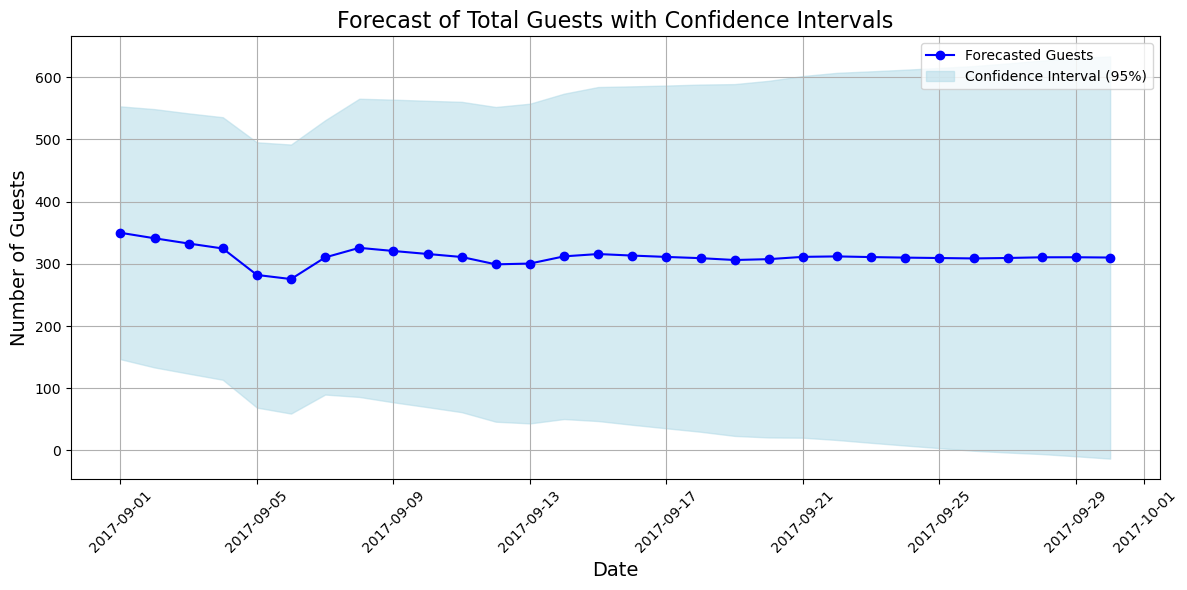

In [372]:

plt.figure(figsize=(12, 6))

# Plot forecasted values
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Guests', color='blue', marker='o')

# Plot confidence intervals
plt.fill_between(forecast_df.index, 
                 forecast_df['Lower CI'], 
                 forecast_df['Upper CI'], 
                 color='lightblue', 
                 alpha=0.5, 
                 label='Confidence Interval (95%)')

# Adding titles and labels
plt.title('Forecast of Total Guests with Confidence Intervals', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Guests', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
